In [10]:
import pandas as pd  #pandas does things with matrixes
import numpy as np #used for sorting a matrix
import matplotlib.pyplot as plt #matplotlib is used for plotting data
import matplotlib.ticker as ticker #used for changing tick spacing
import datetime as dt #used for dates
import matplotlib.dates as mdates #used for dates, in a different way
import os #used for changes of directory
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset_1yr = pd.read_csv("Data/all_stocks_5yr.csv")
dataset_1yr.head()

,Date,Open,High,Low,Close,Volume,Name
0,2012-08-13,92.29,92.59,91.74,92.40,2075391.0,MMM
1,2012-08-14,92.36,92.50,92.01,92.30,1843476.0,MMM
2,2012-08-15,92.00,92.74,91.94,92.54,1983395.0,MMM
3,2012-08-16,92.75,93.87,92.21,93.74,3395145.0,MMM
4,2012-08-17,93.93,94.30,93.59,94.24,3069513.0,MMM


In [4]:
dataset_1yr.describe()

,Open,High,Low,Close,Volume
count,606417.000000,606593.000000,606574.000000,606801.000000,6.063950e+05
mean,79.529041,80.257435,78.799338,79.557920,4.500925e+06
std,93.383162,94.187977,92.535300,93.382168,9.336171e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,38.070000,38.460000,37.700000,38.090000,1.077091e+06
50%,59.240000,59.790000,58.690000,59.270000,2.131913e+06
75%,89.390000,90.150000,88.620000,89.430000,4.442768e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [5]:
# Getting rid of null columns

missing_data = pd.DataFrame(dataset_1yr.isnull().sum()).T
print(missing_data)

for index, column in enumerate(missing_data.columns):
    if missing_data.loc[0][index] != 0:
        dataset_1yr = dataset_1yr.drop(dataset_1yr.loc[dataset_1yr[column].isnull()].index)
        
missing_data = pd.DataFrame(dataset_1yr.isnull().sum()).T
print(missing_data)

   Date  Open  High  Low  Close  Volume  Name
0     0   384   208  227      0     406     0
   Date  Open  High  Low  Close  Volume  Name
0     0     0     0    0      0       0     0


In [6]:
dataset_1yr['Mid'] = (dataset_1yr['High'] + dataset_1yr['Low'])/2
dataset_1yr.head(10)

,Date,Open,High,Low,Close,Volume,Name,Mid
0,2012-08-13,92.29,92.59,91.74,92.40,2075391.0,MMM,92.165
1,2012-08-14,92.36,92.50,92.01,92.30,1843476.0,MMM,92.255
2,2012-08-15,92.00,92.74,91.94,92.54,1983395.0,MMM,92.340
3,2012-08-16,92.75,93.87,92.21,93.74,3395145.0,MMM,93.040
4,2012-08-17,93.93,94.30,93.59,94.24,3069513.0,MMM,93.945
5,2012-08-20,94.00,94.17,93.55,93.89,1640008.0,MMM,93.860
6,2012-08-21,93.98,94.10,92.99,93.21,2302988.0,MMM,93.545
7,2012-08-22,92.56,93.36,92.43,92.68,2463908.0,MMM,92.895
8,2012-08-23,92.65,92.68,91.79,91.98,1823757.0,MMM,92.235
9,2012-08-24,92.03,92.97,91.94,92.83,1945796.0,MMM,92.455


In [17]:
stocknames = dataset_1yr.Name.unique()
stocknames = np.sort(stocknames, kind='quicksort')
print(stocknames[:20])

['A' 'AAL' 'AAP' 'AAPL' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADS' 'ADSK' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN']


In [18]:
def simple_plot(dataframe, name, feature, interval_day = 60):
    
    allstocksingle = dataframe[dataframe['Name'] == name] #makes matrix with only the stock info

    x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in allstocksingle['Date']] #convert date to something python understands
    y = allstocksingle[feature] #plots which ever catagory you entered above

    plt.figure(figsize=(12,6))

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y')) #display the date properly
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = interval_day)) #x axis tick every 60 days
    #plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100)) # sets y axis tick spacing to 100
    
    y_max_lim = dataframe[dataframe['Name'] == name][feature].max() + dataframe[dataframe['Name'] == name][feature].max()/10
    y_min_lim = dataframe[dataframe['Name'] == name][feature].min() - dataframe[dataframe['Name'] == name][feature].min()/10
    
    #plt.ylim(y_min_lim,y_max_lim)
    #plt.xlim(startdate, enddate)
    plt.plot(x,y) #plots the x and y
    plt.grid(True) #turns on axis grid
    plt.xticks(rotation=90,fontsize = 10) #rotates the x axis ticks 90 degress and font size 10
    plt.title(name + ' Stock') #prints the title on the top
    plt.ylabel(feature + ' Price') #labels y axis
    plt.xlabel('Date') #labels x axis

def simple_plot_by_date(dataframe, name, feature, start_day, end_day, interval_day = 60):
    
    startdate = dt.datetime.strptime(start_day, '%Y-%m-%d').date() #enter the start date here, it must be YYYY-MM-DD
    enddate = dt.datetime.strptime(end_day, '%Y-%m-%d').date() #enter the end date here, it must be YYYY-MM-DD
    
    allstocksingle = dataframe[dataframe['Name'] == name] #makes matrix with only the stock info

    x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in allstocksingle['Date']] #convert date to something python understands
    y = allstocksingle[feature] #plots which ever catagory you entered above

    plt.figure(figsize=(12,6))

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y')) #display the date properly
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = interval_day)) #x axis tick every 60 days
    #plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100)) # sets y axis tick spacing to 100
    
    y_max_lim = dataframe[dataframe['Name'] == name][feature].max() + dataframe[dataframe['Name'] == name][feature].max()/10
    y_min_lim = dataframe[dataframe['Name'] == name][feature].min() - dataframe[dataframe['Name'] == name][feature].min()/10
    
    plt.ylim(y_min_lim,y_max_lim)
    plt.xlim(startdate, enddate)
    plt.plot(x,y) #plots the x and y
    plt.grid(True) #turns on axis grid
    plt.xticks(rotation=90,fontsize = 10) #rotates the x axis ticks 90 degress and font size 10
    plt.title(name + ' Stock') #prints the title on the top
    plt.ylabel(feature + ' Price') #labels y axis
    plt.xlabel('Date') #labels x axis

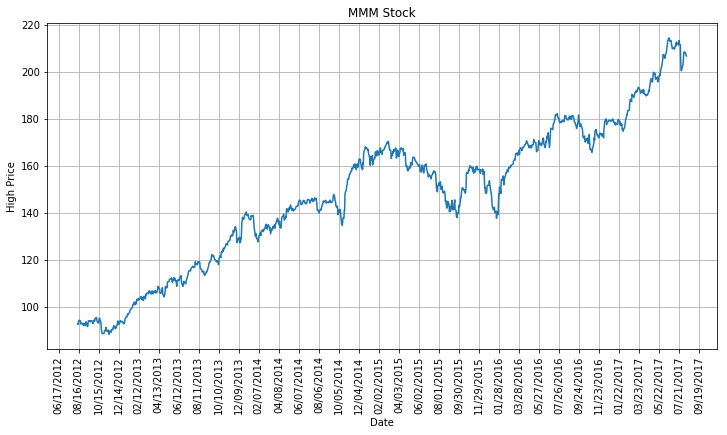

In [12]:
fig1 = simple_plot(dataset_1yr, 'MMM', 'High')
#plt.savefig('stock.pdf')

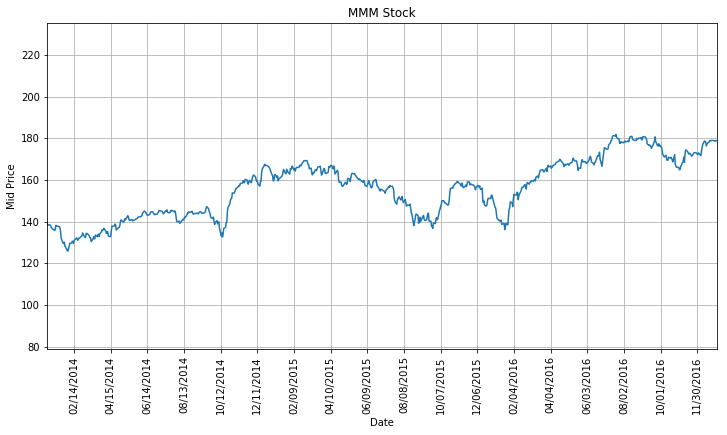

In [14]:
simple_plot_by_date(dataset_1yr, 'MMM', 'Mid', '2014-01-01', '2017-01-01')